<a href="https://colab.research.google.com/github/RazerRaymond/MachineLearningPS/blob/main/Model_Comparison_Study_on_UCI_Letter_Recognition_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model Comparison Study on UCI Letter Recognition Dataset

This is a project aiming to study multiple machine learning method on classifying the letter dataset. Method tested: KNN, ANN, SVM, Decision Tree, Random Forest

I tested not only the accuracy but also timed the training time for each method, and used MATPLOTLIB to visualize the comparison and final result

Also did dimensionality reduction to see in what degree it affects the accuracy and training time.

## Library and Data Import/Split

In [ ]:
# libraries needed
import pandas as pd
import numpy as np
import tensorflow as tf
import datetime
import csv
from sklearn import preprocessing
from sklearn import metrics
import time
!pip install xlrd==1.2.0

import pylab as plt

In [ ]:
# import datas
names = ['lettr','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data", names = names)

In [ ]:
from sklearn.model_selection import train_test_split

hk_df = df.loc[(df['lettr'] == 'H') | (df['lettr'] == 'K')]
my_df = df.loc[(df['lettr'] == 'M') | (df['lettr'] == 'Y')]
xc_df = df.loc[(df['lettr'] == 'X') | (df['lettr'] == 'C')]
X_hk, y_hk = hk_df.loc[:, hk_df.columns != 'lettr'], hk_df.loc[:, hk_df.columns == 'lettr']
X_my, y_my = my_df.loc[:, my_df.columns != 'lettr'], my_df.loc[:, my_df.columns == 'lettr']
X_xc, y_xc = xc_df.loc[:, xc_df.columns != 'lettr'], xc_df.loc[:, xc_df.columns == 'lettr']
X_hk_train, X_hk_test, y_hk_train, y_hk_test = train_test_split(X_hk, y_hk, test_size=0.1)
X_my_train, X_my_test, y_my_train, y_my_test = train_test_split(X_my, y_my, test_size=0.1)
X_xc_train, X_xc_test, y_xc_train, y_xc_test = train_test_split(X_xc, y_xc, test_size=0.1)

##  Model Fitting and Cross Validation

In [ ]:
#array to store runtime and accuracy
runtime = []
accru = []

### KNN - number of neighbors as hyperparameter

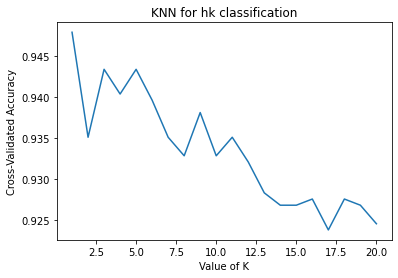

In [ ]:
# Ploting scheme credit: https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 20
k_range = range(1, 21)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_hk_train, y_hk_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("KNN for hk classification")
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
#do test run and check accurcacy with final validation set
start = time.time()
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_hk_train, y_hk_train)
y_pred = knn.predict(X_hk_test)
end = time.time()
runtime.append(end - start)
accru.append(metrics.accuracy_score(y_hk_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_hk_test, y_pred))

Accuracy: 0.972972972972973


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


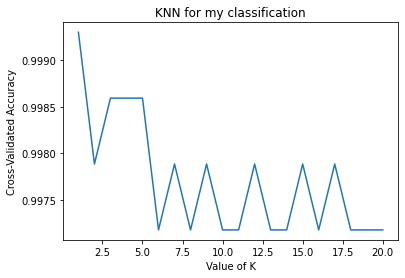

In [ ]:
# K-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 20
k_range = range(1, 21)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_my_train, y_my_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("KNN for my classification")
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

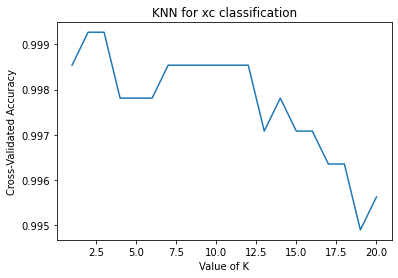

In [ ]:
# K-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 20
k_range = range(1, 21)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_xc_train, y_xc_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("KNN for xc classification")
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### KNN - algorithm of computing distance as hyperparameter - EC

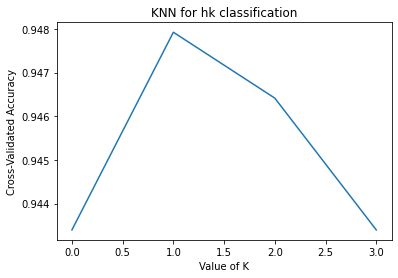

In [ ]:
# Avoid too many repetitive work, only do training for HK task

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 20
k_range = range(0, 4)
algos=['auto', 'ball_tree', 'kd_tree', 'brute']
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=3, algorithm = algos[k])
    scores = cross_val_score(knn, X_hk_train, y_hk_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("KNN for hk classification")
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### SVM - kernel method as hyperparameter

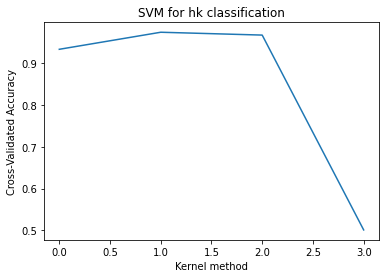

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

# choose kernel method
k_range = range(0, 4)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
k_scores = []
for k in k_range:
    svmc = svm.SVC(kernel=kernels[k])
    scores = cross_val_score(svmc, X_hk_train, y_hk_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("SVM for hk classification")
plt.xlabel('Kernel method')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
#do test run and check accurcacy with final validation set
start = time.time()
svmc = svm.SVC(kernel='poly')
svmc.fit(X_hk_train, y_hk_train)
y_pred = svmc.predict(X_hk_test)
end = time.time()
runtime.append(end - start)
accru.append(metrics.accuracy_score(y_hk_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_hk_test, y_pred))

Accuracy: 0.972972972972973


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


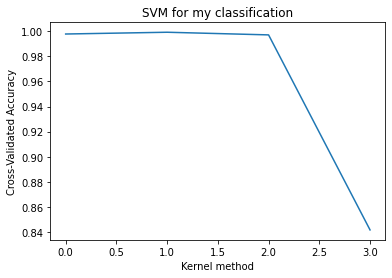

In [ ]:
# choose kernel method
k_range = range(0, 4)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
k_scores = []
for k in k_range:
    svmc = svm.SVC(kernel=kernels[k])
    scores = cross_val_score(svmc, X_my_train, y_my_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("SVM for my classification")
plt.xlabel('Kernel method')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

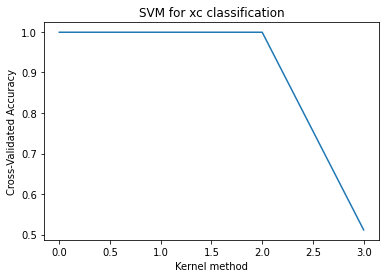

In [ ]:
# choose kernel method
k_range = range(0, 4)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
k_scores = []
for k in k_range:
    svmc = svm.SVC(kernel=kernels[k])
    scores = cross_val_score(svmc, X_xc_train, y_xc_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("SVM for xc classification")
plt.xlabel('Kernel method')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### SVM - degree of kernel function as hyperparameter - EC

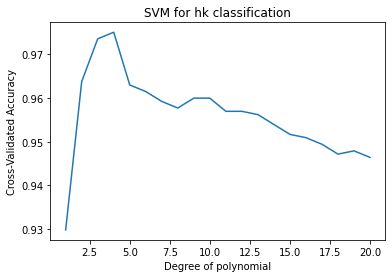

In [ ]:
# Avoid too many repetitive work, only do training for HK task

from sklearn import svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

# choose kernel method
k_range = range(1, 21)
k_scores = []
for k in k_range:
    svmc = svm.SVC(kernel='poly', degree = k)
    scores = cross_val_score(svmc, X_hk_train, y_hk_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("SVM for hk classification")
plt.xlabel('Degree of polynomial')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Random Forest - max tree depth as hyperparameter

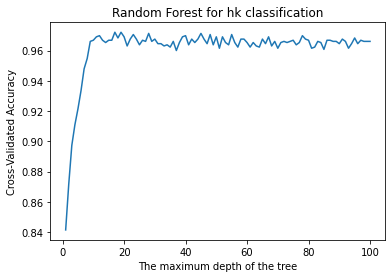

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 101
k_range = range(1, 101)
k_scores = []
for k in k_range:
    rf = RandomForestClassifier(max_depth=k)
    scores = cross_val_score(rf, X_hk_train, y_hk_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("Random Forest for hk classification")
plt.xlabel('The maximum depth of the tree')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
#do test run and check accurcacy with final validation set
start = time.time()
rf = RandomForestClassifier(max_depth=43)
rf.fit(X_hk_train, y_hk_train)
y_pred = rf.predict(X_hk_test)
end = time.time()
runtime.append(end - start)
accru.append(metrics.accuracy_score(y_hk_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_hk_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 0.9864864864864865


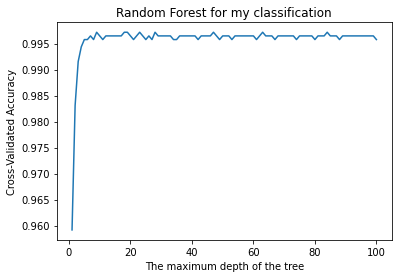

In [ ]:
# choose k between 1 to 101
k_range = range(1, 101)
k_scores = []
for k in k_range:
    rf = RandomForestClassifier(max_depth=k)
    scores = cross_val_score(rf, X_my_train, y_my_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("Random Forest for my classification")
plt.xlabel('The maximum depth of the tree')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

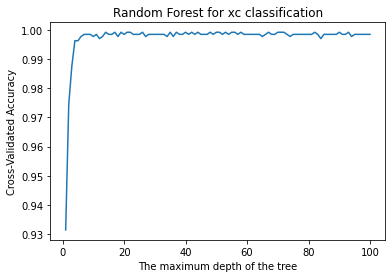

In [ ]:
# choose k between 1 to 101
k_range = range(1, 101)
k_scores = []
for k in k_range:
    rf = RandomForestClassifier(max_depth=k)
    scores = cross_val_score(rf, X_xc_train, y_xc_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("Random Forest for xc classification")
plt.xlabel('The maximum depth of the tree')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Decision Tree - max number of features considered when splitting as hyperparameter

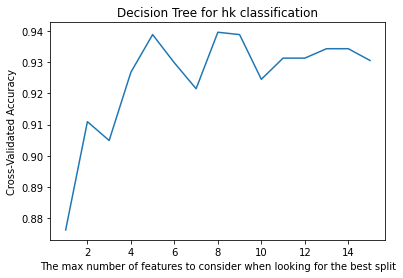

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 16
k_range = range(1, 16)
k_scores = []
for k in k_range:
    dectree = DecisionTreeClassifier(max_features=k)
    scores = cross_val_score(dectree, X_hk_train, y_hk_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("Decision Tree for hk classification")
plt.xlabel('The max number of features to consider when looking for the best split')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
#do test run and check accurcacy with final validation set
start = time.time()
dectree = DecisionTreeClassifier(max_features=12)
dectree.fit(X_hk_train, y_hk_train)
y_pred = dectree.predict(X_hk_test)
end = time.time()
runtime.append(end - start)
accru.append(metrics.accuracy_score(y_hk_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_hk_test, y_pred))

Accuracy: 0.9527027027027027


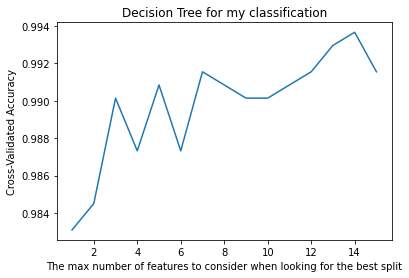

In [ ]:
# choose k between 1 to 16
k_range = range(1, 16)
k_scores = []
for k in k_range:
    dectree = DecisionTreeClassifier(max_features=k)
    scores = cross_val_score(dectree, X_my_train, y_my_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("Decision Tree for my classification")
plt.xlabel('The max number of features to consider when looking for the best split')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

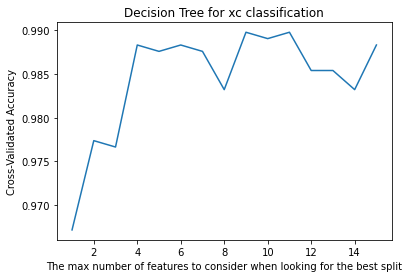

In [ ]:
# choose k between 1 to 16
k_range = range(1, 16)
k_scores = []
for k in k_range:
    dectree = DecisionTreeClassifier(max_features=k)
    scores = cross_val_score(dectree, X_xc_train, y_xc_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
# plot
plt.plot(k_range, k_scores)
plt.title("Decision Tree for xc classification")
plt.xlabel('The max number of features to consider when looking for the best split')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Decision Tree - split creterions and strategies as hyperparameters - EC

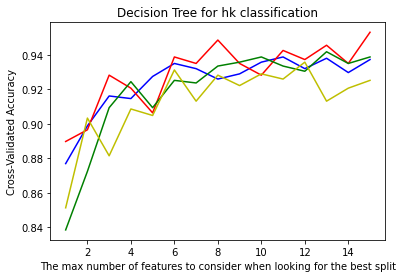

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

#gini & best split
# choose k between 1 to 16
k_range = range(1, 16)
k_scores = []
for k in k_range:
    dectree = DecisionTreeClassifier(max_features=k)
    scores = cross_val_score(dectree, X_hk_train, y_hk_train.values.ravel(), cv=5)
    k_scores.append(scores.mean())
#entropy & best split
# choose k between 1 to 16
k_scores_1 = []
for k in k_range:
    dectree = DecisionTreeClassifier(max_features=k, criterion = 'entropy')
    scores = cross_val_score(dectree, X_hk_train, y_hk_train.values.ravel(), cv=5)
    k_scores_1.append(scores.mean())
# entropy & random split
k_scores_2 = []
for k in k_range:
    dectree = DecisionTreeClassifier(max_features=k, criterion = 'entropy', splitter = 'random')
    scores = cross_val_score(dectree, X_hk_train, y_hk_train.values.ravel(), cv=5)
    k_scores_2.append(scores.mean())

#gini & random split
k_scores_3 = []
for k in k_range:
    dectree = DecisionTreeClassifier(max_features=k, splitter = 'random')
    scores = cross_val_score(dectree, X_hk_train, y_hk_train.values.ravel(), cv=5)
    k_scores_3.append(scores.mean())
# plot
plt.plot(k_range, k_scores, color = 'b')
plt.plot(k_range, k_scores_1, color = 'r')
plt.plot(k_range, k_scores_2, color = 'g')
plt.plot(k_range, k_scores_3, color = 'y')
plt.title("Decision Tree for hk classification")
plt.xlabel('The max number of features to consider when looking for the best split')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Artificial Neural Network - HK - networks layer design as hyperparameter


In [ ]:
from pandas.core.common import any_none
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline
#Partial credit https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/

#Accuracy score tracker array
k_scores = []

# ANN Creater Function
def create_network():
  #Initialising ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
  ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
  #output layer
  ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  #compile
  ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  # Return compiled network
  return ann

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)
scores = cross_val_score(neural_network, X_hk_train, y_hk_train.values.ravel(), cv=5, scoring="accuracy")
k_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
# ANN Creater Function
def create_network():
  #Initialising ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=12,activation="softsign"))
  ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
  ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
  ann.add(tf.keras.layers.Dense(units=3,activation="selu"))
  #output layer
  ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  #compile
  ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  # Return compiled network
  return ann

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

scores = cross_val_score(neural_network, X_hk_train, y_hk_train.values.ravel(), cv=5, scoring="accuracy")
k_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
# ANN Creater Function
def create_network():
  #Initialising ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=16,activation="relu"))
  ann.add(tf.keras.layers.Dense(units=12,activation="softmax"))
  ann.add(tf.keras.layers.Dense(units=8,activation="softmax"))
  ann.add(tf.keras.layers.Dense(units=4,activation="elu"))
  #output layer
  ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  #compile
  ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  # Return compiled network
  return ann

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

scores = cross_val_score(neural_network, X_hk_train, y_hk_train.values.ravel(), cv=5, scoring="accuracy")
k_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


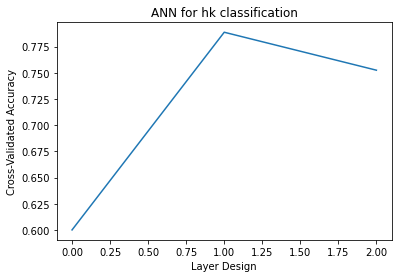

In [ ]:
plt.plot(range(0,3), k_scores)
plt.title("ANN for hk classification")
plt.xlabel('Layer Design')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
#do test run and check accurcacy with final validation set
# ANN Creater Function
def create_network():
  #Initialising ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=12,activation="softsign"))
  ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
  ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
  ann.add(tf.keras.layers.Dense(units=3,activation="selu"))
  #output layer
  ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  #compile
  ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  # Return compiled network
  return ann
  
start = time.time()
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)
neural_network.fit(X_hk_train, y_hk_train)
y_pred = neural_network.predict(X_hk_test)
end = time.time()
runtime.append(end - start)
accru.append(metrics.accuracy_score(y_hk_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_hk_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Accuracy: 0.8648648648648649


### Artificial Neural Network - MY

In [ ]:
from pandas.core.common import any_none
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline
#Partial credit https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/

#Accuracy score tracker array
k_scores = []

# ANN Creater Function
def create_network():
  #Initialising ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
  ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
  #output layer
  ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  #compile
  ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  # Return compiled network
  return ann

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)
scores = cross_val_score(neural_network, X_my_train, y_my_train.values.ravel(), cv=5, scoring="accuracy")
k_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
# ANN Creater Function
def create_network():
  #Initialising ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=12,activation="softsign"))
  ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
  ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
  ann.add(tf.keras.layers.Dense(units=3,activation="selu"))
  #output layer
  ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  #compile
  ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  # Return compiled network
  return ann

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

scores = cross_val_score(neural_network, X_my_train, y_my_train.values.ravel(), cv=5, scoring="accuracy")
k_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
# ANN Creater Function
def create_network():
  #Initialising ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=16,activation="relu"))
  ann.add(tf.keras.layers.Dense(units=12,activation="softmax"))
  ann.add(tf.keras.layers.Dense(units=8,activation="softmax"))
  ann.add(tf.keras.layers.Dense(units=4,activation="elu"))
  #output layer
  ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  #compile
  ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  # Return compiled network
  return ann

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

scores = cross_val_score(neural_network, X_my_train, y_my_train.values.ravel(), cv=5, scoring="accuracy")
k_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


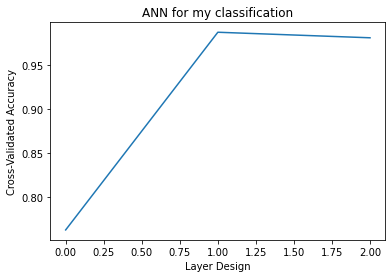

In [ ]:
plt.plot(range(0,3), k_scores)
plt.title("ANN for my classification")
plt.xlabel('Layer Design')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Artificial Neural Network - XC



In [ ]:
from pandas.core.common import any_none
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline
#Partial credit https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/

#Accuracy score tracker array
k_scores = []

# ANN Creater Function
def create_network():
  #Initialising ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
  ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
  #output layer
  ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  #compile
  ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  # Return compiled network
  return ann

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)
scores = cross_val_score(neural_network, X_xc_train, y_xc_train.values.ravel(), cv=5, scoring="accuracy")
k_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
# ANN Creater Function
def create_network():
  #Initialising ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=12,activation="softsign"))
  ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
  ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
  ann.add(tf.keras.layers.Dense(units=3,activation="selu"))
  #output layer
  ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  #compile
  ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  # Return compiled network
  return ann

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

scores = cross_val_score(neural_network, X_xc_train, y_xc_train.values.ravel(), cv=5, scoring="accuracy")
k_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
# ANN Creater Function
def create_network():
  #Initialising ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=16,activation="relu"))
  ann.add(tf.keras.layers.Dense(units=12,activation="softmax"))
  ann.add(tf.keras.layers.Dense(units=8,activation="softmax"))
  ann.add(tf.keras.layers.Dense(units=4,activation="elu"))
  #output layer
  ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  #compile
  ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  # Return compiled network
  return ann

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

scores = cross_val_score(neural_network, X_xc_train, y_xc_train.values.ravel(), cv=5, scoring="accuracy")
k_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


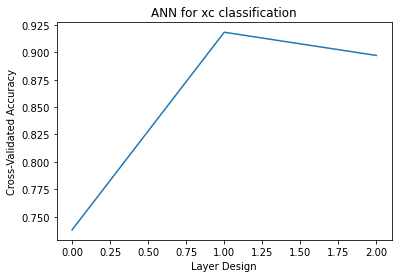

In [ ]:
plt.plot(range(0,3), k_scores)
plt.title("ANN for xc classification")
plt.xlabel('Layer Design')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Run Time plot - To avoid repetitive work, for HK only.

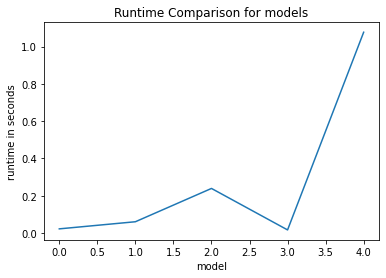

In [ ]:
plt.plot(range(0,5), runtime)
plt.title("Runtime Comparison for models")
plt.xlabel('model')
plt.ylabel('runtime in seconds')
plt.show()

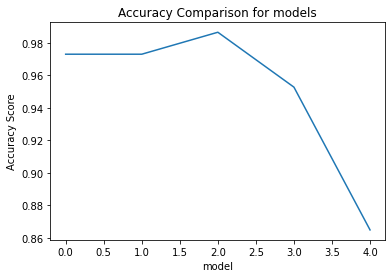

In [ ]:
plt.plot(range(0,5), accru)
plt.title("Accuracy Comparison for models")
plt.xlabel('model')
plt.ylabel('Accuracy Score')
plt.show()

## Dimension Reduction

In [ ]:
#array to store runtime and accuracy
runtime_dm = []
acc_dm = []

### Method 1: Simple Quality Filtering

In [ ]:
# Calculate the Variance for each column
df.var(numeric_only=True)
# y-box, x2bar, x2ybr, y-ege has the highest variances. So we drop them
df_sqf = df.drop(columns = ['x-box','width','high','onpix','x-bar','y-bar','y2bar','xybar','xy2br','x-ege','xegvy','yegvx'])
df_sqf.info()

hk_df_sqf = df_sqf.loc[(df_sqf['lettr'] == 'H') | (df_sqf['lettr'] == 'K')]
my_df_sqf = df_sqf.loc[(df_sqf['lettr'] == 'M') | (df_sqf['lettr'] == 'Y')]
xc_df_sqf = df_sqf.loc[(df_sqf['lettr'] == 'X') | (df_sqf['lettr'] == 'C')]
X_hk_sqf, y_hk_sqf = hk_df_sqf.loc[:, hk_df_sqf.columns != 'lettr'], hk_df_sqf.loc[:, hk_df_sqf.columns == 'lettr']
X_my_sqf, y_my_sqf = my_df_sqf.loc[:, my_df_sqf.columns != 'lettr'], my_df_sqf.loc[:, my_df_sqf.columns == 'lettr']
X_xc_sqf, y_xc_sqf = xc_df_sqf.loc[:, xc_df_sqf.columns != 'lettr'], xc_df_sqf.loc[:, xc_df_sqf.columns == 'lettr']
X_hk_train_sqf, X_hk_test_sqf, y_hk_train_sqf, y_hk_test_sqf = train_test_split(X_hk_sqf, y_hk_sqf, test_size=0.1)
X_my_train_sqf, X_my_test_sqf, y_my_train_sqf, y_my_test_sqf = train_test_split(X_my_sqf, y_my_sqf, test_size=0.1)
X_xc_train_sqf, X_xc_test_sqf, y_xc_train_sqf, y_xc_test_sqf = train_test_split(X_xc_sqf, y_xc_sqf, test_size=0.1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   y-box   20000 non-null  int64 
 2   x2bar   20000 non-null  int64 
 3   x2ybr   20000 non-null  int64 
 4   y-ege   20000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 781.4+ KB


#### kNN Application

In [ ]:
#do test run and check accurcacy with final validation set
start = time.time()
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_hk_train_sqf, y_hk_train_sqf)
y_pred = knn.predict(X_hk_test_sqf)
end = time.time()
runtime_dm.append(end - start)
acc_dm.append(metrics.accuracy_score(y_hk_test_sqf, y_pred))
print("Accuracy:",metrics.accuracy_score(y_hk_test_sqf, y_pred))

Accuracy: 0.8783783783783784


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### SVM Application

In [ ]:
#do test run and check accurcacy with final validation set
start = time.time()
svmc = svm.SVC(kernel='poly')
svmc.fit(X_hk_train_sqf, y_hk_train_sqf)
y_pred = svmc.predict(X_hk_test_sqf)
end = time.time()
runtime_dm.append(end - start)
acc_dm.append(metrics.accuracy_score(y_hk_test_sqf, y_pred))
print("Accuracy:",metrics.accuracy_score(y_hk_test_sqf, y_pred))

Accuracy: 0.6756756756756757


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Random Forest

In [ ]:
#do test run and check accurcacy with final validation set
start = time.time()
rf = RandomForestClassifier(max_depth=43)
rf.fit(X_hk_train_sqf, y_hk_train_sqf)
y_pred = rf.predict(X_hk_test_sqf)
end = time.time()
runtime_dm.append(end - start)
acc_dm.append(metrics.accuracy_score(y_hk_test_sqf, y_pred))
print("Accuracy:",metrics.accuracy_score(y_hk_test_sqf, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 0.9054054054054054


### Method 2: Embedded Methods

#### HK 

Feature: 0, Score: 0.00412
Feature: 1, Score: 0.02078
Feature: 2, Score: 0.00882
Feature: 3, Score: 0.00097
Feature: 4, Score: 0.01296
Feature: 5, Score: 0.01522
Feature: 6, Score: 0.00562
Feature: 7, Score: 0.19322
Feature: 8, Score: 0.02480
Feature: 9, Score: 0.05044
Feature: 10, Score: 0.03168
Feature: 11, Score: 0.48315
Feature: 12, Score: 0.06946
Feature: 13, Score: 0.00246
Feature: 14, Score: 0.04821
Feature: 15, Score: 0.02810


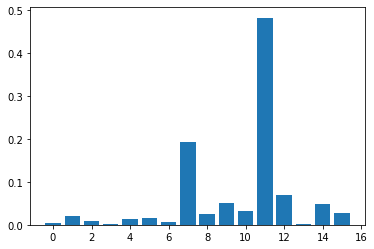

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_hk, y_hk)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
X_hk_train_ebm = X_hk_train.iloc[:,[11,7,12,9]]
X_hk_test_ebm = X_hk_test.iloc[:,[11,7,12,9]]
start = time.time()
dectree = DecisionTreeClassifier()
dectree.fit(X_hk_train_ebm, y_hk_train)
y_pred = dectree.predict(X_hk_test_ebm)
end = time.time()
runtime_dm.append(end - start)
acc_dm.append(metrics.accuracy_score(y_hk_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_hk_test, y_pred))

Accuracy: 0.9594594594594594


#### MY

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01385
Feature: 2, Score: 0.00190
Feature: 3, Score: 0.03913
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00240
Feature: 7, Score: 0.00903
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.02937
Feature: 11, Score: 0.00321
Feature: 12, Score: 0.80279
Feature: 13, Score: 0.07643
Feature: 14, Score: 0.00264
Feature: 15, Score: 0.01925


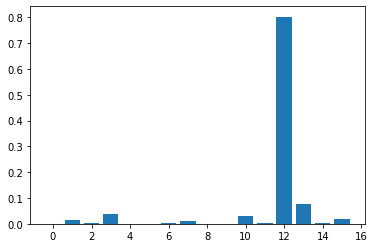

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_my, y_my)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
X_my_train_ebm = X_my_train.iloc[:,[12,13,3,10]]
X_my_test_ebm = X_my_test.iloc[:,[12,13,3,10]]
dectree = DecisionTreeClassifier()
dectree.fit(X_my_train_ebm, y_my_train)
y_pred = dectree.predict(X_my_test_ebm)
print("Accuracy:",metrics.accuracy_score(y_my_test, y_pred))

Accuracy: 0.9810126582278481


#### XC

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00252
Feature: 5, Score: 0.00351
Feature: 6, Score: 0.01282
Feature: 7, Score: 0.18020
Feature: 8, Score: 0.03196
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00552
Feature: 11, Score: 0.70520
Feature: 12, Score: 0.00310
Feature: 13, Score: 0.02199
Feature: 14, Score: 0.00783
Feature: 15, Score: 0.02536


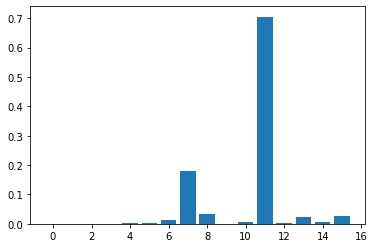

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_xc, y_xc)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
X_xc_train_ebm = X_xc_train.iloc[:,[11,7,8,15]]
X_xc_test_ebm = X_xc_test.iloc[:,[11,7,8,15]]
dectree = DecisionTreeClassifier()
dectree.fit(X_xc_train_ebm, y_xc_train)
y_pred = dectree.predict(X_xc_test_ebm)
print("Accuracy:",metrics.accuracy_score(y_xc_test, y_pred))

Accuracy: 0.9934640522875817


### Method 3: Feature Extraction - PCA

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_hk)
X_hk_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
principalComponents = pca.fit_transform(X_my)
X_my_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
principalComponents = pca.fit_transform(X_xc)
X_xc_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

X_hk_train_pca, X_hk_test_pca, y_hk_train_pca, y_hk_test_pca = train_test_split(X_hk_pca, y_hk, test_size=0.1)
X_my_train_pca, X_my_test_pca, y_my_train_pca, y_my_test_pca = train_test_split(X_my_pca, y_my, test_size=0.1)
X_xc_train_pca, X_xc_test_pca, y_xc_train_pca, y_xc_test_pca = train_test_split(X_xc_pca, y_xc, test_size=0.1)

#### ANN

In [ ]:
#do test run and check accurcacy with final validation set
# ANN Creater Function
def create_network():
  #Initialising ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=12,activation="softsign"))
  ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
  ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
  ann.add(tf.keras.layers.Dense(units=3,activation="selu"))
  #output layer
  ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  #compile
  ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  # Return compiled network
  return ann

start = time.time()
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)
neural_network.fit(X_hk_train_pca, y_hk_train_pca)
y_pred = neural_network.predict(X_hk_test_pca)
end = time.time()
runtime_dm.append(end - start)
acc_dm.append(metrics.accuracy_score(y_hk_test_pca, y_pred))
print("Accuracy:",metrics.accuracy_score(y_hk_test_pca, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Accuracy: 0.831081081081081


### Run Time plot - To avoid repetitive work, for HK only.

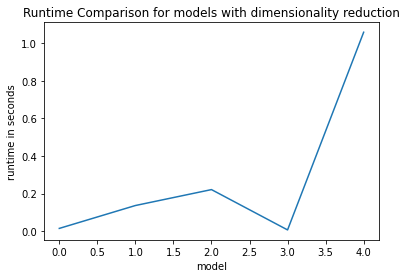

In [ ]:
plt.plot(range(0,5), runtime_dm)
plt.title("Runtime Comparison for models with dimensionality reduction")
plt.xlabel('model')
plt.ylabel('runtime in seconds')
plt.show()

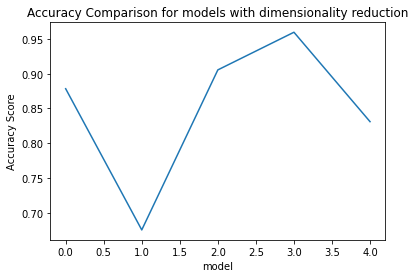

In [ ]:
plt.plot(range(0,5), acc_dm)
plt.title("Accuracy Comparison for models with dimensionality reduction")
plt.xlabel('model')
plt.ylabel('Accuracy Score')
plt.show()